In [11]:
from numpy import *
from pylab import plt

### Physical Constants

In [12]:
σ  = 5.67e-8              # W/m²/K⁴ Stefan-Boltzman constant
T0 = 273.16               # K       0 = C
Sc = 1367.0               # W / m²  solar constant

### Stefan-Boltzmann Law

In [13]:
def SB_P(T):
    """P(T)"""
    return SB * T**4

def SB_T(P):
    """T(P)"""
    T2 = sqrt(P/SB)
    T4 = sqrt(T2)
    return T4

### Earth

In [14]:
RE = 6371028.6            # m       earth radius
AE = 4.0 * pi * RE**2     # m^2     earth surface
AC = pi * RE**2           # m^2     earth cross section
a  = 0.3                  #         aerth albedo

#### Mean power per m², that has to be radiated to space

In [19]:
P_0 = AC/AE * Sc * (1.0 - a)
print("P_0 = %5.2f W/m²" % (P_0))

P_0 = 239.22 W/m²


#### Mean Surface Temperature
$T_0 = (P_0/σ)^{(1/4)}$

In [20]:
T_0 = (P_0/σ)**(1/4)
print("T_0 = %5.2f K" % (T_0))

T_0 = 254.86 K


#### A given part b of surface at $T_h$ and the rest of the surface (1-b) at $T_l$

In [21]:
b = 0.25

If all the power is emitted from the part b the temperature has to be:

In [22]:
P_max = AC/(b*AE) * Sc * (1.0 - a)
T_max = (P_max/σ)**(1/4)
print("P_max = %5.2f W/m²" % (P_max))
print("T_max = %5.2f K" % (T_max))

P_max = 956.90 W/m²
T_max = 360.43 K


Temperature $T_h$

In [23]:
T_h  = mgrid[T_0:T_max:200j]

Power emitted by this part:

In [24]:
P_h  = σ * T_h**4 * b

Power that has to emitted by the rest of th surface

In [25]:
P_c  = P_0 - P_h
P_c  = where(P_c >= 0.0, P_c, 0.0)

In [ ]:
Temperature:

In [26]:
T_c  = (P_c/σ/(1-b))**(1/4)  
P_h  = σ * T_h**4 * (1-b)

Mean temperature

In [27]:
T_mean = T_h * b + T_c * (1-b)

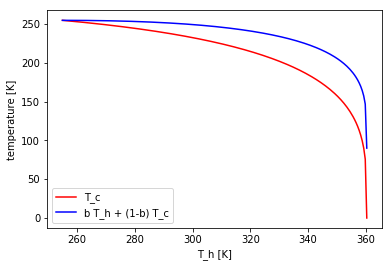

In [28]:
plt.plot(T_h, T_c, 'r', label="T_c")
plt.plot(T_h, T_mean, 'b', label="b T_h + (1-b) T_c")
plt.xlabel("T_h [K]")
plt.ylabel("temperature [K]")
plt.legend(loc = 'best')

# Mean Temperature

In [34]:
T_earth = 288.0          # K mean measured surface temerature of the earth
P_rad = σ * T_earth**4   # W/m² mean emitted power
P_ath = P_rad - P_0      # power tht is blocked by the athmosphere

print("P_rad = %5.3f W/m²" % P_rad)
print("P_ath = %5.3f W/m²" % P_ath)

P_rad = 390.079 W/m²
P_ath = 150.854 W/m²
